# Comparison between Linear Regression & KNN Regression

For the purpose of comparing Linear Regression Model and KNN Regression Model, the houseprice dataset from previous assignment is chosen. A semplified selection of numerical variables will be done because there will be no need to take care of cleaning data, missing values, and feature engineering.

In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hprice = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

hprice[['overallqual', 'grlivarea', 'garagecars', 'garagearea']].head(10)

,overallqual,grlivarea,garagecars,garagearea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836
5,5,1362,2,480
6,8,1694,2,636
7,7,2090,2,484
8,7,1774,2,468
9,5,1077,1,205


In [2]:
# Visualization of the variable's types
hprice[['overallqual', 'grlivarea', 'garagecars', 'garagearea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
overallqual    1460 non-null int64
grlivarea      1460 non-null int64
garagecars     1460 non-null int64
garagearea     1460 non-null int64
dtypes: int64(4)
memory usage: 45.7 KB


In [3]:
# Check for missing data
selected_v = hprice[['overallqual', 'grlivarea', 'garagecars', 'garagearea']]

total_missing = selected_v.isnull().sum().sort_values()
percent_missing = (selected_v.isnull().sum()/selected_v.isnull().count()).sort_values()
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

print(missing_data)

             Total  Percent
overallqual      0      0.0
grlivarea        0      0.0
garagecars       0      0.0
garagearea       0      0.0


## Regression Model

In [7]:
X = hprice[['overallqual', 'grlivarea', 'garagecars', 'garagearea']]
Y = hprice['saleprice']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     842.9
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:56:49   Log-Likelihood:                -14031.
No. Observations:                1168   AIC:                         2.807e+04
Df Residuals:                    1163   BIC:                         2.810e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.913e+04   5374.304    -18.445      

###  Evaluating the test set and the prediction set 

In [8]:
y_preds = results.predict(X_test)

y_preds.head()

135     161313.603991
1100     -1416.071771
833     180641.130997
471     237508.925399
1123     71569.641062
dtype: float64

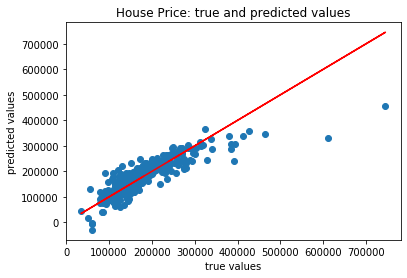

In [9]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("House Price: true and predicted values")
plt.show()

## KNN Regression Model

In [18]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [28]:
# Build our knn model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
selected_var = hprice[['overallqual', 'grlivarea', 'garagecars', 'garagearea']]

X = pd.DataFrame(selected_var)
Y = hprice['saleprice']
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

KNN Plot of Actual vs. Predicted Sales Prices


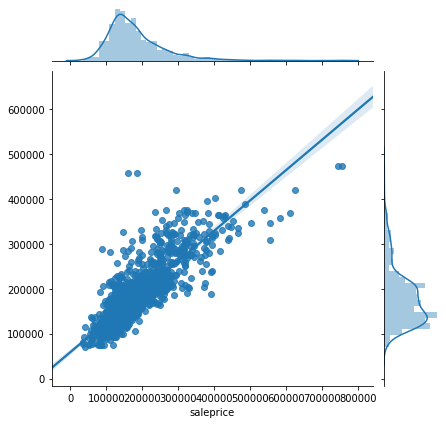

In [32]:
import seaborn as sns
knn_pred = knn.predict(X)
knn_actual = Y

print('KNN Plot of Actual vs. Predicted Sales Prices')
sns.jointplot(knn_actual, knn_pred, kind="reg")
plt.show()

The most of points are close to eachother, so we don'n need to try our model with weight factor because weighted method works reasonably well for positions of between points.  

In [33]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(score)

Unweighted Accuracy: 0.63 (+/- 0.10)
[0.71540615 0.64078571 0.62936682 0.58738165 0.56615918]


KNN model lacks interpretability. An OLS linear regression will have clearly interpretable coefficients that can themselves give some indication of the ‘effect size’ of a given feature. Asking which features have the largest effect doesn’t really make sense for a KNN model. KNN models also can’t really be used for feature selection, in the way that a linear regression with an added cost function term.